# Logistic Regression
- Logistic Regression은 Binary Classification (이진분류) 문제를 풀기 위한 대표적인 알고리즘입니다.
  - Binary Classification
    - 두 가지 선택지 중 하나를 고르는 문제를 말합니다.
      - EX) OX 퀴즈, 합격,불합격 등



## Sigmoid Function
- 선형적이지 않은 분류 문제를 풀때는 이전에 사용한 Linear Regression을 적용할 수 없습니다.
  - EX) 점수에 따른 합불 문제
    - 일정 점수를 기준으로 합격 불합격이 갈리므로 Wx+b로 나타낼 수 없습니다.
- 이럴 때 사용하는 것이 Sigmoid Function입니다.
  - Sigmoid Function은 아래의 식을 갖습니다.
    - $sigmoid{Wx+b}=\frac{1}{1+e^{Wx+b}}$
    - 선형회귀와 마찬가지로 학습을 통해 적절한 W와 b를 찾는 것이 목표입니다.
    - W와 b가 linear regression 때는 각각 기울기와 절편이었습니다. Sigmoid 함수에서는 어떤 것인지 아래 실습에서 확인해봅니다.
  - sigmoid 함수는 아래와 같기 때문에 Threshold를 이용하여 분류작업에 이용할 수 있습니다.
  

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def sig(x,W,b) :
  return 1/(1+np.exp(-(W*x+b)))

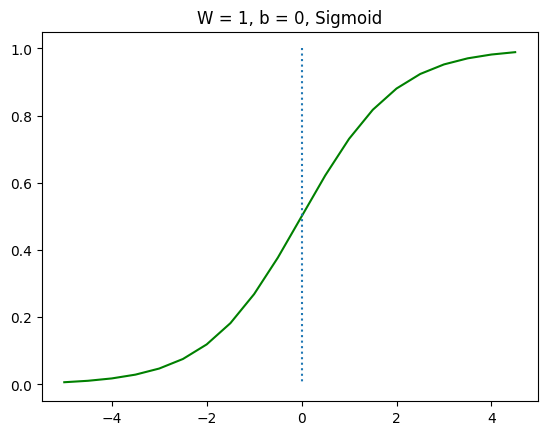

In [33]:
x = np.arange(-5,5,0.5)
y = sig(x,1,0)
plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],":") # 가운데 점선표시
plt.title("W = 1, b = 0, Sigmoid")
plt.show()

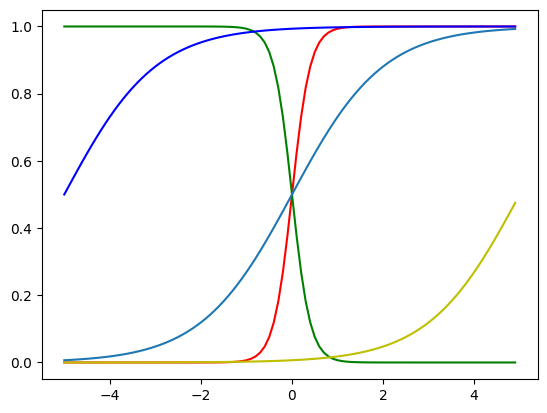

In [34]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sig(x,5,0)
y2 = sig(x,-5,0)
y3 = sig(x,1,5)
y4 = sig(x,1,-5)
y5 = sig(x,1,0)
plt.plot(x,y1,"r")
plt.plot(x,y2,"g")
plt.plot(x,y3,"b")
plt.plot(x,y4,"y")
plt.plot(x,y5,"-")

- 위의 그래프를 통해서 아래와 같은 사실을 알 수 있습니다.
  - W는 그래프의 경사도를 결정합니다. (W의 절대값이 커질 수록 경사도가 급격해집니다.)
  - b는 그래프를 좌,우로 이동시킵니다. (파란색과 같이 b가 양수면 왼쪽으로 이동하고, 노란색 선과 같이 오른쪽으로 이동합니다.)

## Loss Function
- Loss Function을 이전 Linear Regression 때처럼 MSE를 사용하기 힘듭니다.
  - MSE를 사용하기 힘든 이유
    - MSE의 식은 $\frac{1}{n} Σ (y^{i}-H(x^{i}))^2$ 입니다.
      - 여기서 H(x)에 Sigmoid식을 넣고 미분을 하게 되면, 심한 비볼록 형태의 그래프가 나오게 되고, 이때는 local minimum이 존재하게 되어, 최적의 훈련을 하지 못하게 될 수 있습니다.
- Sigmoid를 위한 Loss Function 찾는 방법
  1. Sigmoid Function 특징 분석
    - Sigmoid Function의 값은 항상 0과 1 사이에 있습니다.
  2. 특징에 따른 오차 예상
    - 실제 예측 값이 1일 때, 예측 값이 0에 가까울 수록 오차가 커져야 합니다.
    - 실제 예측 값이 0일 때, 예측 값이 1에 가까울 수록 오차가 커져야 합니다.
  3. 2를 만족하는 함수 설계
    - Simgoid의 오차를 만족하는 함수로 아래와 같은 log함수가 존재합니다.
      - if y=1, ${cost(H(x),y) = -log(H(x))}$
      - if y=0, ${cost(H(x),y) = -log(1-H(x))}$
    - 위의 두 식을 통합하면 아래와 같은 식이 완성됩니다.
      - $cost(H(x),y) = - [ylogH(x) + (1-y)log(1-H(x))]$
  4. Loss Function 설계
    - 위의 cost함수를 그냥 적용할 수 없기 때문에 모든 오차의 평균을 구하는 방식으로 이용합니다.
    
    

In [35]:
# torch로 logistic regression 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(42)

In [36]:
# Data
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [37]:
# Check data's shape
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : torch.Size([6, 2])
y_train : torch.Size([6, 1])


In [38]:
# Set W,b
"""
size of x_train is 6,2 and size of y_train is 6,1
so we have to set size of W is 2,1 (That way, the shape of Wx comes out shape of y)
"""
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [39]:
# H(x) (sigmoid)
H = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))

In [40]:
# loss function
loss = -(y_train*torch.log(H)+(1-y_train)*torch.log(1-H))

In [41]:
#check loss function
print(loss)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [42]:
cost = loss.mean()

In [43]:
# 전체 코드
opt = optim.SGD([W,b],lr = 1)
epochs = 1000
for epoch in range(1,epochs+1):
  H = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
  loss = -(y_train*torch.log(H) + (1-y_train)*torch.log(1-H)).mean()

  opt.zero_grad()
  loss.backward()
  opt.step()

  if epoch % 100 == 0 :
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

Epoch  100/1000 Cost: 0.135644
Epoch  200/1000 Cost: 0.080964
Epoch  300/1000 Cost: 0.058062
Epoch  400/1000 Cost: 0.045398
Epoch  500/1000 Cost: 0.037327
Epoch  600/1000 Cost: 0.031720
Epoch  700/1000 Cost: 0.027592
Epoch  800/1000 Cost: 0.024422
Epoch  900/1000 Cost: 0.021911
Epoch 1000/1000 Cost: 0.019871


## 4-2. nn.Module과 Class로 구현하는 Logistic Regression
- sigmoid를 이용한 Hypothesis는 아래와 같습니다.
  - $sigmoid(Wx+b)$
- Linear regression의 Hypothesis는 아래와 같습니다.
  - $Wx+b$
- 따라서 x가 주어졌을 때, Linear Regression을 거친 후, Sigmoid를 거치면 Binary Classification이 가능합니다.

- 저희는 이전에, Linear Regression을 nn.Module에 있는 nn.Linear()를 이용하였습니다.
- 또한, Sigmoid도 nn.Sigmoid()로 제공해주고 있습니다.
- 따라서 nn.Sigmoid(nn.Linear(x))를 작성하면 원하는 결과를 얻을 수 있습니다.

### Sequential로 구현하는 Logistic Regression

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(42)

In [60]:
# declare data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [61]:
# sequential을 이용하여 함수 연결
model = nn.Sequential(
    nn.Linear(2,1), #input dim = (2), output_dim = (1)
    nn.Sigmoid() # output = result of sigmoid
)

In [62]:
# 훈련 코드
opt = optim.SGD(model.parameters(),lr = 1)
epochs = 1000
for epoch in range(1,epochs+1):
  output = model(x_train)
  loss = -(y_train*torch.log(output) + (1-y_train)*(torch.log(1-output))).mean()
  #loss = F.binary_cross_entropy(output, y_train)

  opt.zero_grad()
  loss.backward()
  opt.step()

  if epoch % 10 == 0:
    prediction = output >= torch.FloatTensor([0.5]) # 예측 값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제 값과 일치 하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, epochs, loss.item(), accuracy * 100))# 각 에 포 크마다 정확도를 출력

Epoch   10/1000 Cost: 0.605885 Accuracy 66.67%
Epoch   20/1000 Cost: 0.424702 Accuracy 83.33%
Epoch   30/1000 Cost: 0.358176 Accuracy 83.33%
Epoch   40/1000 Cost: 0.303257 Accuracy 83.33%
Epoch   50/1000 Cost: 0.254214 Accuracy 83.33%
Epoch   60/1000 Cost: 0.209952 Accuracy 100.00%
Epoch   70/1000 Cost: 0.174403 Accuracy 100.00%
Epoch   80/1000 Cost: 0.153294 Accuracy 100.00%
Epoch   90/1000 Cost: 0.141469 Accuracy 100.00%
Epoch  100/1000 Cost: 0.132029 Accuracy 100.00%
Epoch  110/1000 Cost: 0.123805 Accuracy 100.00%
Epoch  120/1000 Cost: 0.116563 Accuracy 100.00%
Epoch  130/1000 Cost: 0.110137 Accuracy 100.00%
Epoch  140/1000 Cost: 0.104397 Accuracy 100.00%
Epoch  150/1000 Cost: 0.099238 Accuracy 100.00%
Epoch  160/1000 Cost: 0.094577 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090344 Accuracy 100.00%
Epoch  180/1000 Cost: 0.086483 Accuracy 100.00%
Epoch  190/1000 Cost: 0.082946 Accuracy 100.00%
Epoch  200/1000 Cost: 0.079695 Accuracy 100.00%
Epoch  210/1000 Cost: 0.076694 Accuracy 100.0

### 인공신경망 Class를 이용하여 구현하는 Logistic Regression
- 조건 및 설명
  - nn.Module을 상속하는 Class로 제작해야 합니다.
  - __init__은 모델의 구조를 정의하는 생성자입니다.
  - forward는 model 객체를 데이터와 함께 호출하면 자동으로 실행되는 메서드입니다.
    - EX) **model(x)**

In [65]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [67]:
# 훈련 코드
epochs = 1000
BC = Model()
opt = optim.SGD(BC.parameters(),lr = 1)
for epoch in range(1,epochs+1):
  output = BC(x_train)
  loss = -(y_train*torch.log(output) + (1-y_train)*(torch.log(1-output))).mean()
  #loss = F.binary_cross_entropy(output, y_train)

  opt.zero_grad()
  loss.backward()
  opt.step()

  if epoch % 10 == 0:
    prediction = output >= torch.FloatTensor([0.5]) # 예측 값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제 값과 일치 하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, epochs, loss.item(), accuracy * 100))# 각 에 포 크마다 정확도를 출력

Epoch   10/1000 Cost: 0.941401 Accuracy 66.67%
Epoch   20/1000 Cost: 0.647065 Accuracy 83.33%
Epoch   30/1000 Cost: 0.538747 Accuracy 83.33%
Epoch   40/1000 Cost: 0.450648 Accuracy 83.33%
Epoch   50/1000 Cost: 0.366601 Accuracy 83.33%
Epoch   60/1000 Cost: 0.287567 Accuracy 83.33%
Epoch   70/1000 Cost: 0.219445 Accuracy 83.33%
Epoch   80/1000 Cost: 0.173311 Accuracy 100.00%
Epoch   90/1000 Cost: 0.151711 Accuracy 100.00%
Epoch  100/1000 Cost: 0.140306 Accuracy 100.00%
Epoch  110/1000 Cost: 0.131025 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122923 Accuracy 100.00%
Epoch  130/1000 Cost: 0.115783 Accuracy 100.00%
Epoch  140/1000 Cost: 0.109442 Accuracy 100.00%
Epoch  150/1000 Cost: 0.103774 Accuracy 100.00%
Epoch  160/1000 Cost: 0.098677 Accuracy 100.00%
Epoch  170/1000 Cost: 0.094068 Accuracy 100.00%
Epoch  180/1000 Cost: 0.089881 Accuracy 100.00%
Epoch  190/1000 Cost: 0.086059 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082558 Accuracy 100.00%
Epoch  210/1000 Cost: 0.079336 Accuracy 100.00%